In [2]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot
import matplotlib.pyplot as plt

### Optimize 50% coverage device for Dan

optimize both for the effective overlap efficiency factor of 0.13 and 0.45. Ideally, the design parameters should not vary significantly between the two

In [8]:
desired_coverage = 0.5

l_tes0 = 200e-6
l_tes_bnds = [100e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 1200e-6
l_fin_bnds = [100e-6, 500e-6]
n_fin0 = 6
n_fin_bnds = [2,8]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11


bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]


w_overlap0 = None
w_overlap_bnds = [5e-6, 40e-6]

fix_w_overlap=True

veff_WAloverlap=.13 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fix_w_overlap=fix_w_overlap,
                                                    w_overlap = w_overlap0,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                     bounds = bounds, 
                                                    w_overlap_bounds=w_overlap_bnds)

veff_WAloverlap=.45 # measured
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fix_w_overlap=fix_w_overlap,
                                                      w_overlap = w_overlap0,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                    bounds = bounds, 
                                                    w_overlap_bounds=w_overlap_bnds)


Effective W/Al volume = 0.13
resolution: 406.6 [meV]
TES Length = 277.9 [μm]
Overlap Legth = 19.0 [μm]
Fin Length = 172.0 [μm]
Fin Height = 0.6 [μm]
N Fins = 6
Total Al surface coverage = 49.997 [%]
Absolute phonon collection energy efficiency = 26.94 [%]
Number of TESs = 763
Rn = 350.0 [mOhms]
Close Packed: True
Phase margin = 33.3 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 625.1 [meV]
TES Length = 270.6 [μm]
Overlap Legth = 14.3 [μm]
Fin Length = 176.1 [μm]
Fin Height = 0.6 [μm]
N Fins = 6
Total Al surface coverage = 50.000 [%]
Absolute phonon collection energy efficiency = 23.30 [%]
Number of TESs = 743
Rn = 350.0 [mOhms]
Close Packed: True
Phase margin = 7.3 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------




We can see that the TES length and Fin length are largely unchanged between the two designs, only the overlap region changes, which makes sense

### Plots

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fde8df176d0>)

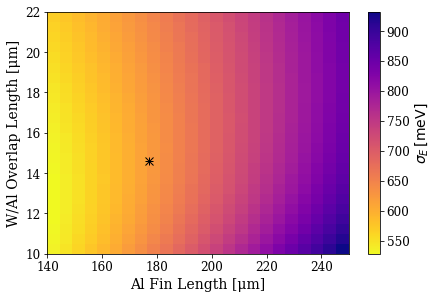

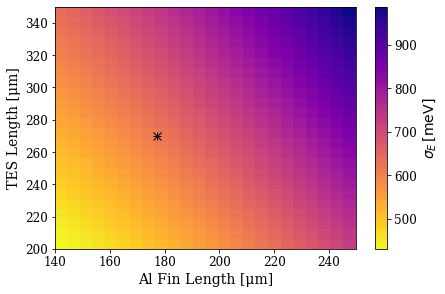

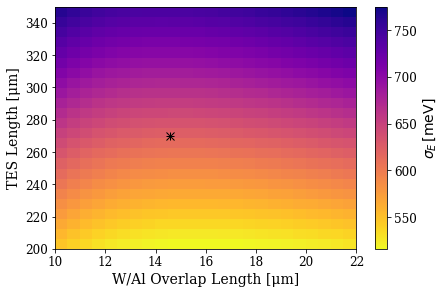

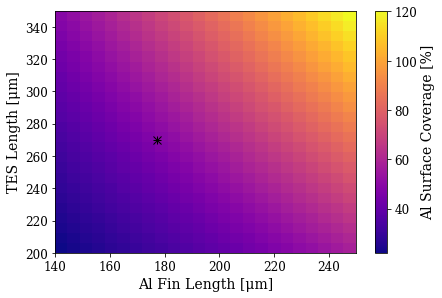

In [7]:
n = 25

l = np.linspace(200e-6, 350e-6, n)
l_f = np.linspace(140e-6, 250e-6, n)
l_overlap = np.linspace(10e-6, 22e-6, n)

plot.plot_loverlap_vs_lfin(l_overlap, l_f, det_opt_1, val='energy')
plot.plot_ltes_vs_lfin(l, l_f, det_opt_1, val='energy')
plot.plot_ltes_vs_loverlap(l, l_overlap, det_opt_1, val='energy')


plot.plot_ltes_vs_lfin(l, l_f, det_opt_1, val='al')
